In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import *
from qiskit import execute
from qiskit.tools.visualization import *
from qiskit.tools.monitor import job_monitor
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor
from qiskit import Aer
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
import math
import qiskit.tools.jupyter

In [2]:
%qiskit_version_table

In [3]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr,cr)

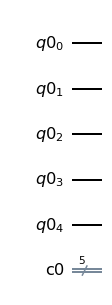

In [4]:
circuit.draw(output='mpl')

In [5]:
for x in range(0, 5):
    circuit.h(qr[x])

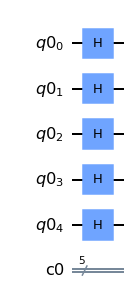

In [6]:
circuit.draw(output='mpl')

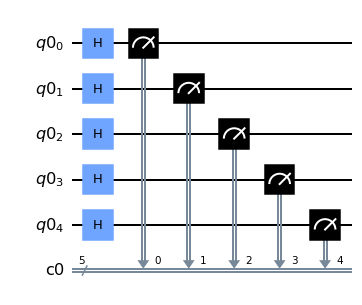

In [7]:
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [8]:
simulator = Aer.get_backend('aer_simulator') #qasm_simulator
shots = 1024
sim_job = execute(circuit, backend=simulator,shots=shots,memory=True)
sim_result = sim_job.result()

/Users/karim/.pyenv/versions/3.10.2/lib/python3.10/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/karim/.pyenv/versions/3.10.2/lib/python3.10/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [9]:
sim_result

Result(backend_name='aer_simulator', backend_version='0.10.3', qobj_id='e6633fa4-672b-4722-aeb7-927d0e303550', job_id='76375947-be89-478b-b5db-5a8e5962e070', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1f': 18, '0x16': 35, '0x12': 33, '0x4': 26, '0x6': 30, '0x1d': 25, '0x0': 27, '0x17': 34, '0xd': 43, '0xe': 29, '0x13': 36, '0xf': 39, '0x18': 29, '0xa': 27, '0x1c': 23, '0x2': 30, '0x14': 32, '0x7': 38, '0x1e': 38, '0x15': 34, '0x5': 41, '0x9': 28, '0x1b': 38, '0x3': 41, '0x1a': 34, '0x1': 34, '0x8': 34, '0x11': 34, '0xc': 37, '0x19': 20, '0x10': 29, '0xb': 28}, memory=['0x3', '0x9', '0x11', '0xc', '0x10', '0x15', '0x1', '0x1a', '0x1b', '0x5', '0x1e', '0x8', '0x2', '0x10', '0x1c', '0x18', '0xc', '0x3', '0xf', '0x8', '0x15', '0x13', '0x1c', '0x13', '0xc', '0xd', '0xc', '0x0', '0x5', '0x1', '0x7', '0xb', '0x13', '0x18', '0x19', '0x1e', '0xa', '0x1d', '0x3', '0x6', '0x19', '0x2', '0xc', '0x14', '0xd', '0x4', '0x9', '0

In [10]:
#to retrieve the results independently, instead of as a probability
sim_memory = sim_result.get_memory()
sim_outputArray = []
for x in range(0, shots):
    converted = int(sim_memory[x], 2)
    sim_outputArray.append(converted)
print(sim_outputArray)

[3, 9, 17, 12, 16, 21, 1, 26, 27, 5, 30, 8, 2, 16, 28, 24, 12, 3, 15, 8, 21, 19, 28, 19, 12, 13, 12, 0, 5, 1, 7, 11, 19, 24, 25, 30, 10, 29, 3, 6, 25, 2, 12, 20, 13, 4, 9, 18, 20, 15, 15, 22, 24, 27, 7, 8, 8, 30, 7, 20, 19, 7, 17, 11, 31, 5, 25, 21, 4, 17, 1, 6, 15, 24, 21, 4, 20, 0, 16, 2, 23, 27, 13, 16, 15, 17, 13, 20, 5, 2, 4, 31, 22, 6, 6, 11, 20, 5, 22, 14, 10, 15, 15, 5, 29, 0, 19, 6, 12, 19, 3, 17, 28, 0, 30, 11, 21, 13, 4, 11, 23, 14, 5, 30, 31, 19, 27, 3, 30, 3, 24, 13, 31, 2, 10, 9, 3, 23, 16, 12, 15, 18, 12, 13, 19, 23, 6, 9, 18, 5, 30, 12, 29, 24, 24, 15, 7, 9, 6, 4, 1, 24, 30, 8, 23, 0, 5, 18, 20, 14, 12, 7, 10, 24, 8, 8, 1, 10, 20, 9, 24, 8, 5, 2, 14, 9, 20, 5, 2, 15, 25, 3, 8, 8, 15, 1, 8, 12, 12, 26, 3, 14, 14, 12, 18, 20, 25, 12, 28, 1, 13, 13, 24, 18, 10, 17, 29, 27, 22, 15, 13, 19, 21, 6, 29, 24, 16, 6, 30, 30, 5, 30, 12, 8, 21, 2, 26, 2, 5, 6, 14, 2, 11, 16, 16, 17, 27, 23, 27, 22, 13, 10, 27, 29, 16, 2, 5, 1, 17, 0, 12, 22, 10, 31, 29, 26, 6, 28, 22, 22, 29, 20, 9

In [11]:
len(sim_outputArray)

1024

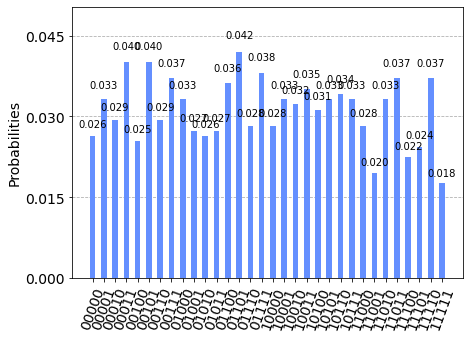

In [12]:
plot_histogram(sim_result.get_counts(circuit))

In [30]:
print(sim_memory)

['00011', '01001', '10001', '01100', '10000', '10101', '00001', '11010', '11011', '00101', '11110', '01000', '00010', '10000', '11100', '11000', '01100', '00011', '01111', '01000', '10101', '10011', '11100', '10011', '01100', '01101', '01100', '00000', '00101', '00001', '00111', '01011', '10011', '11000', '11001', '11110', '01010', '11101', '00011', '00110', '11001', '00010', '01100', '10100', '01101', '00100', '01001', '10010', '10100', '01111', '01111', '10110', '11000', '11011', '00111', '01000', '01000', '11110', '00111', '10100', '10011', '00111', '10001', '01011', '11111', '00101', '11001', '10101', '00100', '10001', '00001', '00110', '01111', '11000', '10101', '00100', '10100', '00000', '10000', '00010', '10111', '11011', '01101', '10000', '01111', '10001', '01101', '10100', '00101', '00010', '00100', '11111', '10110', '00110', '00110', '01011', '10100', '00101', '10110', '01110', '01010', '01111', '01111', '00101', '11101', '00000', '10011', '00110', '01100', '10011', '00011', 

Lets do the same on a quantum device

In [16]:
with open('/Users/karim/staff/cred/IBMQ/tocken.txt', 'r') as file:
    myTocken = file.read().replace('\n', '')
IBMQ.save_account(myTocken,overwrite=True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
provider = IBMQ.get_provider('ibm-q')
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

In [22]:
backend = least_busy(small_devices)
backend.configuration().n_qubits

5

In [25]:
quantum_instance = QuantumInstance(backend=backend,shots=128, skip_qobj_validation = False)
quantum_instance.backend.status()

In [26]:
#provider = IBMQ.get_provider('ibm-q')
#qcomp = provider.get_backend('ibmq_16_melbourne')
shots = 1024
q_job = execute(circuit, backend, shots = shots, memory=True)

In [27]:
job_monitor(q_job)

Job Status: job has successfully run


In [28]:
q_result = q_job.result()
q_memory = q_result.get_memory()
q_outputArray = []
for x in range(0, shots):
    converted = int(q_memory[x], 2)
    q_outputArray.append(converted)
print(q_outputArray)

[26, 9, 2, 14, 19, 14, 13, 21, 28, 11, 21, 24, 11, 2, 0, 11, 16, 4, 24, 30, 1, 23, 16, 31, 31, 25, 18, 2, 1, 6, 10, 29, 3, 9, 23, 26, 14, 26, 2, 21, 11, 15, 17, 23, 9, 2, 13, 12, 9, 24, 2, 26, 28, 10, 0, 10, 22, 31, 5, 17, 1, 9, 16, 18, 11, 24, 22, 25, 9, 9, 4, 1, 23, 6, 3, 31, 27, 22, 18, 28, 20, 4, 20, 2, 9, 2, 28, 14, 1, 26, 19, 6, 0, 1, 1, 19, 24, 1, 22, 14, 5, 0, 25, 0, 3, 24, 24, 4, 11, 16, 2, 25, 4, 15, 29, 28, 24, 2, 13, 25, 12, 13, 29, 14, 24, 11, 11, 27, 27, 21, 18, 6, 17, 11, 16, 2, 28, 1, 27, 9, 2, 12, 24, 14, 13, 0, 14, 29, 18, 8, 12, 4, 24, 1, 9, 2, 1, 17, 2, 0, 12, 10, 30, 6, 28, 29, 12, 16, 7, 23, 14, 11, 21, 22, 16, 17, 18, 4, 20, 0, 29, 5, 8, 26, 19, 6, 15, 6, 10, 24, 8, 19, 18, 28, 24, 19, 30, 5, 19, 0, 5, 20, 26, 31, 11, 28, 14, 0, 30, 6, 25, 0, 3, 4, 2, 3, 31, 28, 20, 30, 11, 1, 8, 31, 1, 3, 26, 0, 20, 14, 30, 18, 3, 4, 8, 10, 29, 20, 25, 0, 17, 4, 2, 25, 17, 9, 26, 1, 18, 15, 27, 26, 12, 6, 21, 30, 9, 10, 8, 30, 21, 31, 17, 7, 3, 30, 9, 0, 11, 13, 28, 0, 1, 19, 5,

In [31]:
q_job.error_message()

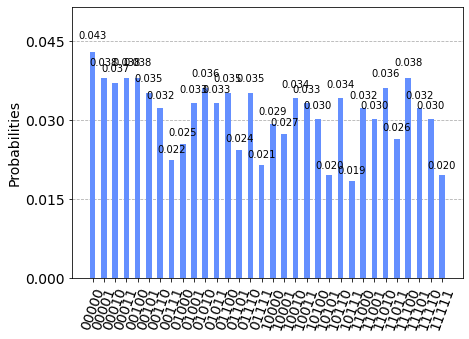

In [32]:
plot_histogram(q_result.get_counts(circuit))